#**DS 4002 Project 2 Script**

Group GKI: Grace Brasselle, Kristy Luk (Leader), and Isabel O’Connor



###**Import Data and Data Cleaning**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

# URL of the raw file
url = 'https://raw.githubusercontent.com/kristyluk/DS4002Project2/main/DATA/DS4002-Project2-Data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

# Remove N/A values
df_cleaned = df.dropna()

###**Explorartory Data Plot**

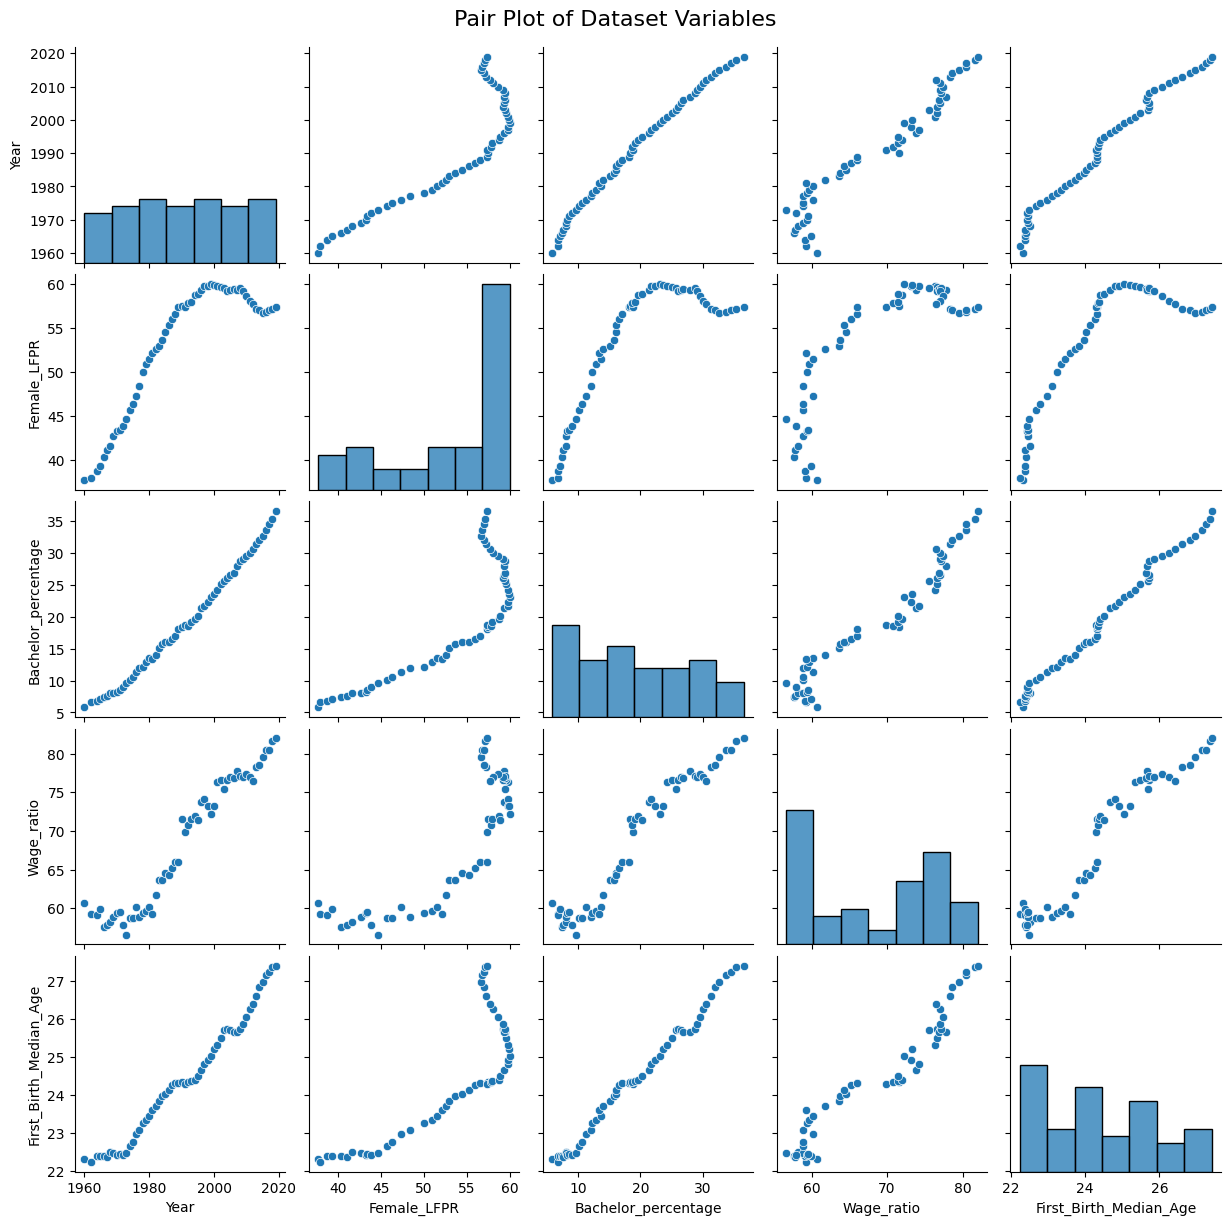

In [ ]:
pair_plot = sns.pairplot(df_cleaned)

pair_plot.fig.suptitle("Pair Plot of Dataset Variables", fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()


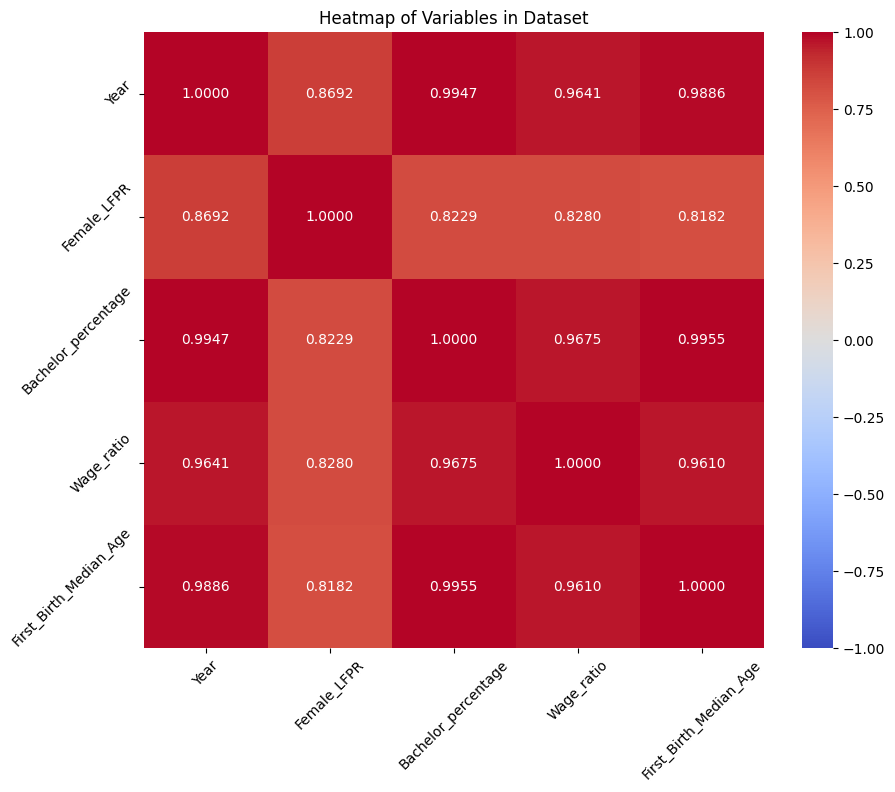

In [ ]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_cleaned.corr(), annot=True, fmt=".4f", cmap='coolwarm', vmin=-1, vmax=1)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title('Heatmap of Variables in Dataset')
plt.show()


<ipython-input-16-db7aee4589c5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=average_lfpt, x='Age_Group', y='Female_LFPR', palette='magma')


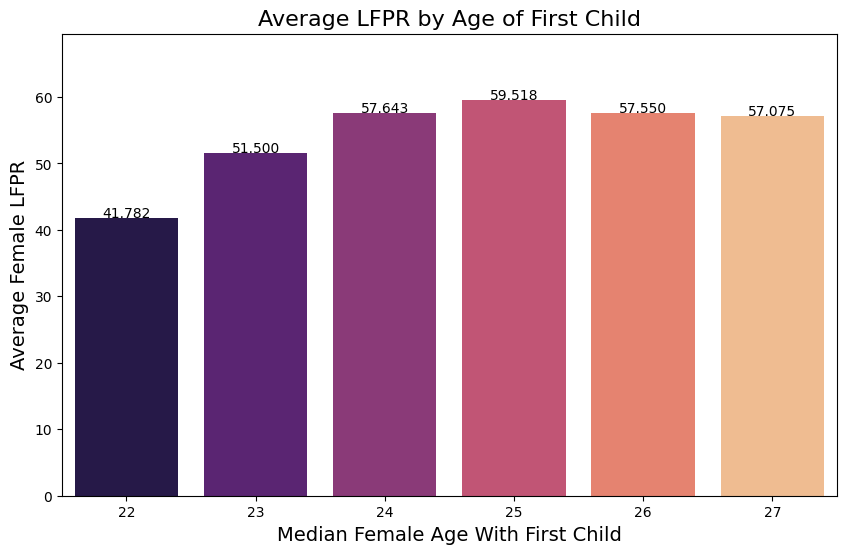

In [ ]:
df['Age_Group'] = df['First_Birth_Median_Age'].astype(str).str[:2]

average_lfpt = df.groupby('Age_Group')['Female_LFPR'].mean().reset_index()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=average_lfpt, x='Age_Group', y='Female_LFPR', palette='magma')

for index, row in average_lfpt.iterrows():
    bar_plot.text(index, row['Female_LFPR'] + 0.1, f'{row["Female_LFPR"]:.3f}',
                  color='black', ha="center")

plt.title('Average LFPR by Age of First Child', fontsize=16)
plt.xlabel('Median Female Age With First Child', fontsize=14)
plt.ylabel('Average Female LFPR', fontsize=14)
plt.ylim(0, average_lfpt['Female_LFPR'].max() + 10)  # Adjust y-axis limit for visibility

plt.show()


###**ARIMA Modeling**

We will first be using the data from just the years 1960-2000 and predicting the values for the twenty-first years, 2001-2019. Then, we will compare the predicted values with the values we have already obtained in the originial dataset in a graph.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load in cleaned dataset for just years 1960-2000
url = 'https://raw.githubusercontent.com/kristyluk/DS4002Project2/main/DATA/20th_century_data.csv'

twenty = pd.read_csv(url)
twenty

,Year,Female_LFPR,Bachelor_percentage,Wage_ratio,First_Birth_Median_Age
0,1960,37.7,5.8,60.7,22.32
1,1962,37.9,6.7,59.3,22.24
2,1964,38.7,6.8,59.1,22.38
3,1965,39.3,7.1,59.9,22.38
4,1966,40.3,7.4,57.6,22.39
5,1967,41.1,7.6,57.8,22.36
6,1968,41.6,8.0,58.2,22.51
7,1969,42.7,8.1,58.9,22.46
8,1970,43.3,8.2,59.4,22.43
9,1971,43.4,8.5,59.5,22.45


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

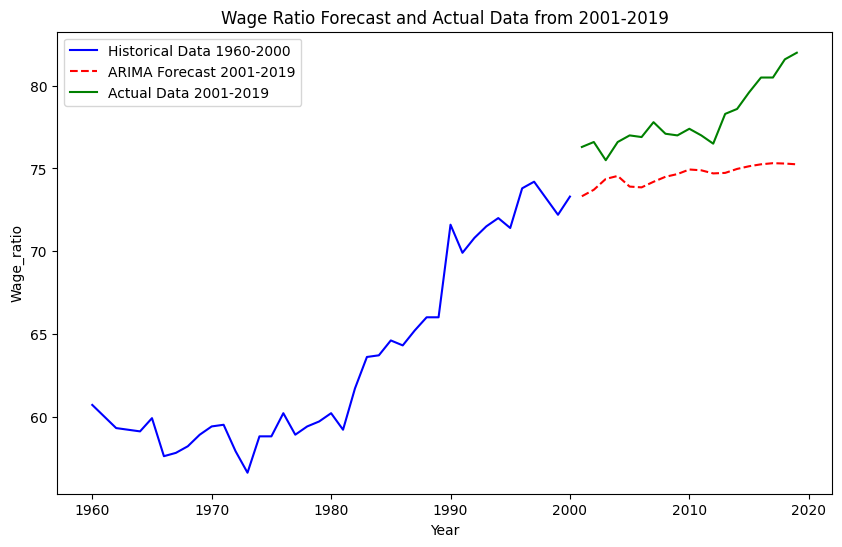

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# This is the fully cleaned dataset
clean_data_path = 'https://raw.githubusercontent.com/kristyluk/DS4002Project2/main/DATA/DS4002-Project2-Data-CLEANED.csv'
clean_data = pd.read_csv(clean_data_path)

# Extract Year and Wage_ratio columns and filtering for years 2001-2019
clean_data.set_index('Year', inplace=True)
actual_data = clean_data.loc[2001:2019]
actual_years = actual_data.index
actual_wage_ratio = actual_data['Wage_ratio']

# Set index and target variable for ARIMA model using 1960-2000 data
historical_data = clean_data.loc[1960:2000]
y = historical_data['Wage_ratio']

# Fit the ARIMA model
model = ARIMA(y, order=(8, 1, 1))
model_fit = model.fit()

# Predict the Wage_ratio for 2001-2019
forecast_steps = 2019 - 2000
forecast_future = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.RangeIndex(start=2001, stop=2020)

# Plot the historical data, actual data, and predicted values
plt.figure(figsize=(10, 6))
plt.plot(historical_data.index, historical_data['Wage_ratio'], label='Historical Data 1960-2000', color='blue')
plt.plot(forecast_index, forecast_future, label='ARIMA Forecast 2001-2019', color='red', linestyle='--')
plt.plot(actual_years, actual_wage_ratio, label='Actual Data 2001-2019', color='green', linestyle='-')

plt.title('Wage Ratio Forecast and Actual Data from 2001-2019')
plt.xlabel('Year')
plt.ylabel('Wage_ratio')
plt.legend()

plt.show()

In [4]:
predicted_wage_ratio = pd.DataFrame({
    'Year': forecast_index,
    'Predicted_Wage_Ratio': forecast_future
})

predicted_wage_ratio['Actual_Wage_Ratio'] = actual_wage_ratio.values

print("Predicted and Actual Wage Ratio for 2001-2019:")
print(predicted_wage_ratio)

Predicted and Actual Wage Ratio for 2001-2019:
    Year  Predicted_Wage_Ratio  Actual_Wage_Ratio
39  2001             73.319294               76.3
40  2002             73.712067               76.6
41  2003             74.366050               75.5
42  2004             74.548966               76.6
43  2005             73.904308               77.0
44  2006             73.856540               76.9
45  2007             74.194767               77.8
46  2008             74.497460               77.1
47  2009             74.660607               77.0
48  2010             74.938482               77.4
49  2011             74.888061               77.0
50  2012             74.701614               76.5
51  2013             74.731917               78.3
52  2014             74.972594               78.6
53  2015             75.133734               79.6
54  2016             75.251426               80.5
55  2017             75.320216               80.5
56  2018             75.297780               81.6
57 